#### 데이터 전처리

데이터셋 분리

In [ ]:
print("✔️ vib_normal 결측치:")
print(vib_normal.isnull().sum())

print("\n✔️ cur_normal 결측치:")
print(cur_normal.isnull().sum())

✔️ vib_normal 결측치:
Time       0
0          0
3.12       0
6.25       0
9.38       0
          ..
1584.38    0
1587.5     0
1590.62    0
1593.75    0
1596.88    0
Length: 513, dtype: int64

✔️ cur_normal 결측치:
Time       0
0          0
1.91       0
3.81       0
5.72       0
          ..
1943.46    0
1945.37    0
1947.28    0
1949.19    0
1951.09    0
Length: 1025, dtype: int64


In [ ]:
vib_train_dataset =	vib_normal.iloc[:1758,	1:].values
vib_test_dataset =	pd.concat([vib_normal.iloc[1758:, 1:], vib_anomaly.iloc[:, 1:]], ignore_index=True).values
print('진동 학습데이터 수:', len(vib_train_dataset))
print('진동 평가데이터 수:', len(vib_test_dataset))

진동 학습데이터 수: 1758
진동 평가데이터 수: 32


In [ ]:
cur_train_dataset =	cur_normal.iloc[:8170,	1:].values
cur_test_dataset =	pd.concat([cur_normal.iloc[8170:, 1:],	cur_anomaly.iloc[:,	1:]], ignore_index=True).values
print('전류 학습데이터 수:', len(cur_train_dataset))
print('전류 평가데이터 수:', len(cur_test_dataset))

전류 학습데이터 수: 8170
전류 평가데이터 수: 64


데이터 표준화

In [ ]:
scaler_vib = StandardScaler()
vib_train_dataset = scaler_vib.fit_transform(vib_train_dataset)
vib_test_dataset = scaler_vib.transform(vib_test_dataset)

scaler_cur = StandardScaler()
cur_train_dataset = scaler_cur.fit_transform(cur_train_dataset)
cur_test_dataset = scaler_cur.transform(cur_test_dataset)

진동 데이터 가시화

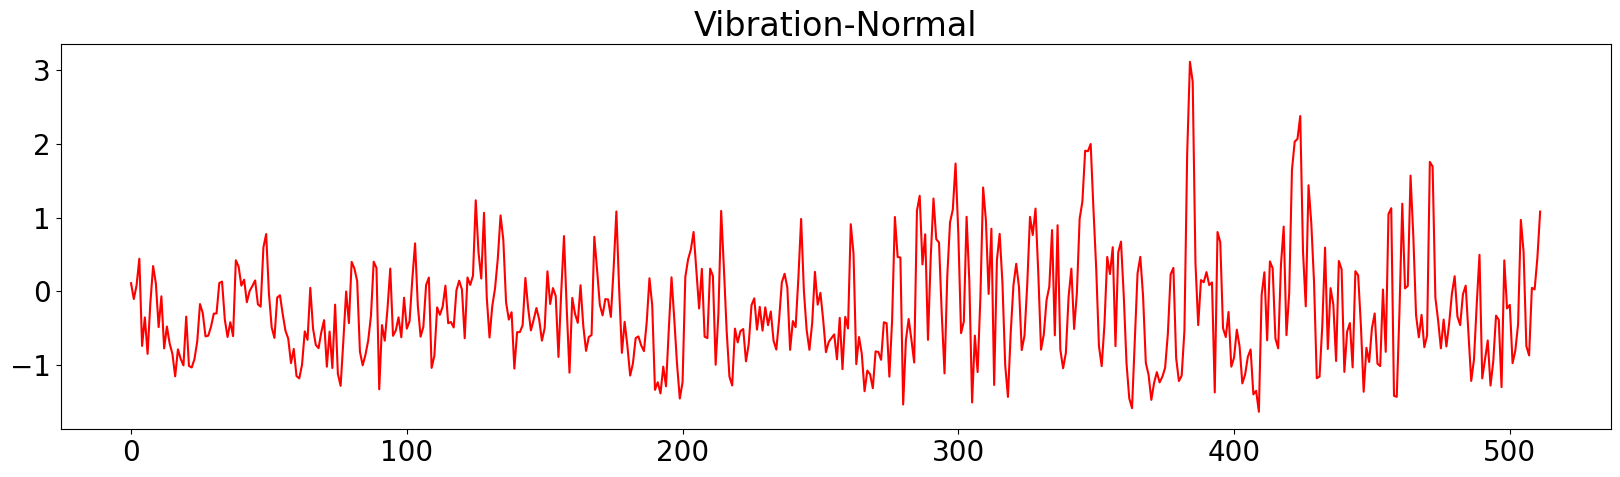

In [ ]:
plt.figure(figsize=(20,	5))
plt.title('Vibration-Normal')
plt.plot(vib_train_dataset[0], color='red')
plt.show()

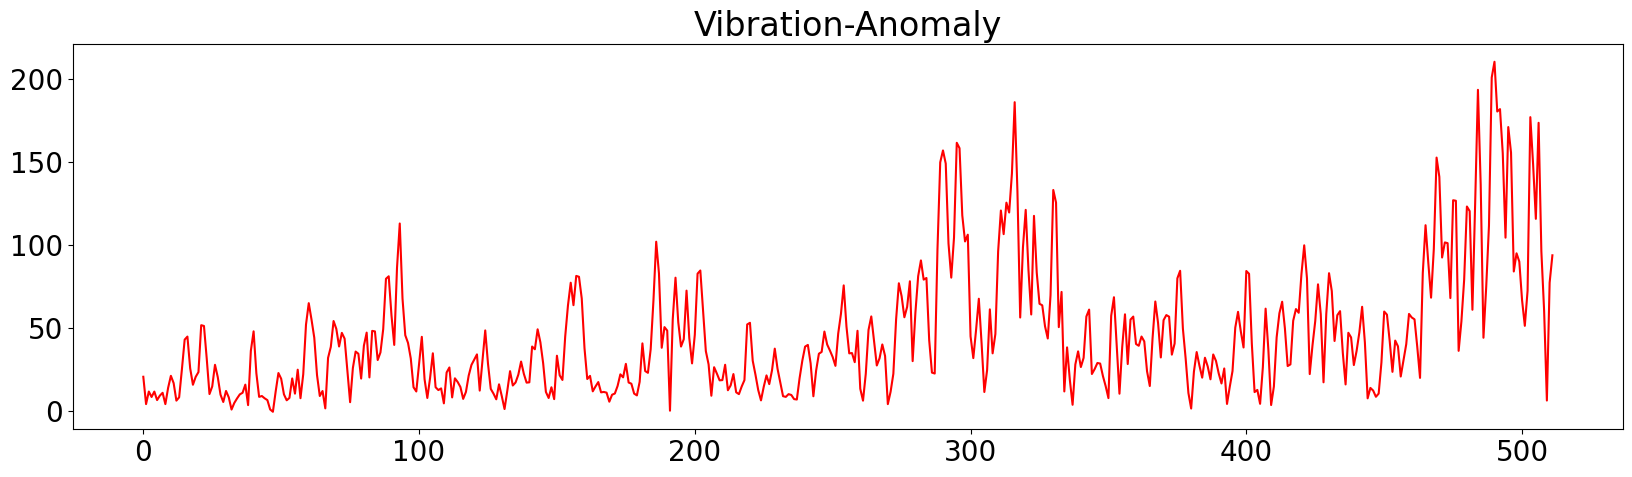

In [ ]:
plt.figure(figsize=(20,	5))
plt.title('Vibration-Anomaly')
plt.plot(vib_test_dataset[-1],	color='red')
plt.show()

전류 데이터 가시화

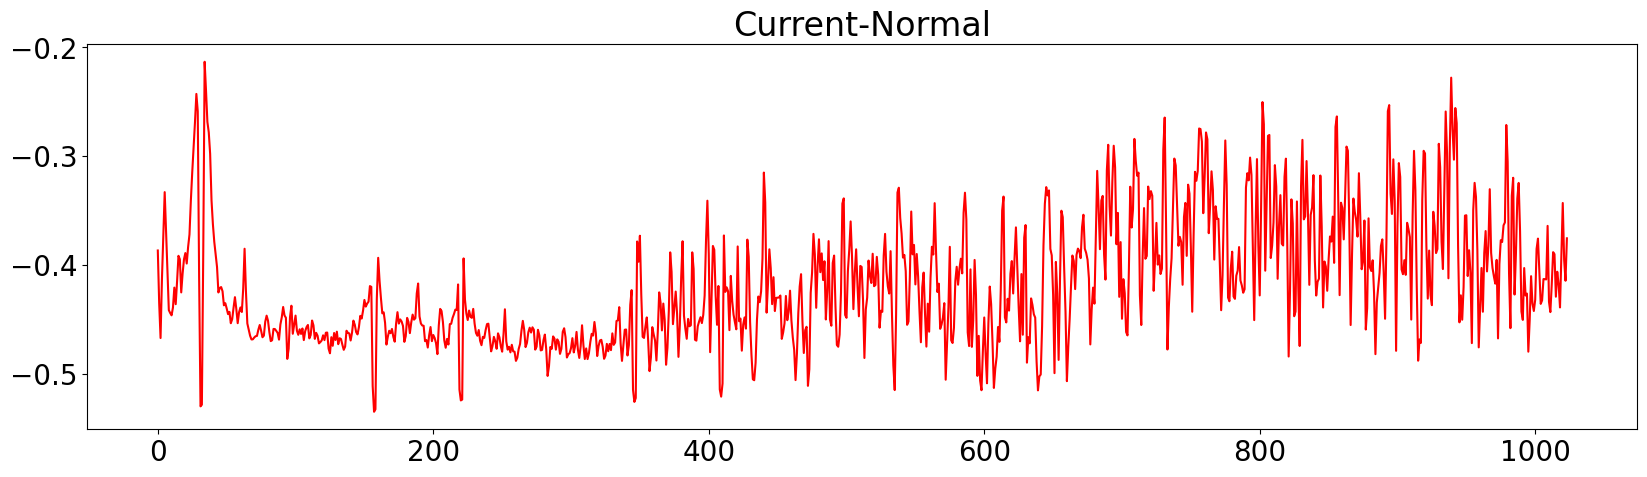

In [ ]:
plt.figure(figsize=(20,	5))
plt.title('Current-Normal')
plt.plot(cur_train_dataset[0],	color='red')
plt.show()

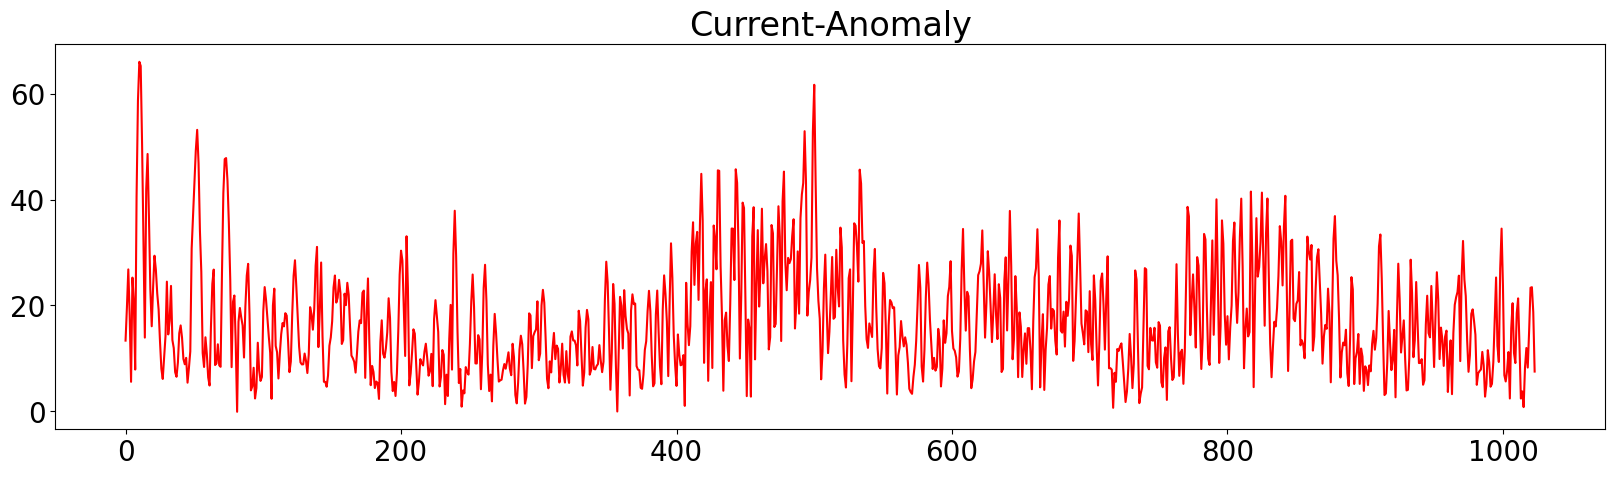

In [ ]:
plt.figure(figsize=(20,	5))
plt.title('Current-Anomaly')
plt.plot(cur_test_dataset[-1],	color='red')
plt.show()

데이터 형태 변환
- 모두가 다 넘파이 배열 형태 -> DataFrame의 values 속성(property)을 이용했기 때문

In [ ]:
type(vib_train_dataset)

numpy.ndarray

In [ ]:
type(cur_train_dataset)

numpy.ndarray

In [ ]:
type(vib_test_dataset)

numpy.ndarray

In [ ]:
type(cur_test_dataset)

numpy.ndarray

In [ ]:
vib_train_dataset.shape

(1758, 512)

In [ ]:
vib_test_dataset.shape

(32, 512)

In [ ]:
cur_train_dataset.shape

(8170, 1024)

In [ ]:
cur_test_dataset.shape

(64, 1024)

#### 데이터셋 차원 변화 : 2차원 넘파일 배열 -> 3차원 배열
- 하는 이유?  Conv-AE 모델에는 입력이 3차원 형태여야 하기 때문

In [ ]:
vib_train_dataset =	vib_train_dataset.reshape(vib_train_dataset.shape[0],	vib_train_dataset.shape[1],	1)
vib_test_dataset =	vib_test_dataset.reshape(vib_test_dataset.shape[0],	vib_test_dataset.shape[1],	1)
cur_train_dataset =	cur_train_dataset.reshape(cur_train_dataset.shape[0],	cur_train_dataset.shape[1],	1)
cur_test_dataset =	cur_test_dataset.reshape(cur_test_dataset.shape[0],	cur_test_dataset.shape[1],	1)
print('진동 학습데이터	Shape:', vib_train_dataset.shape)
print('진동 평가데이터	Shape:', vib_test_dataset.shape)
print('전류 학습데이터	Shape:', cur_train_dataset.shape)
print('전류 평가데이터	Shape:', cur_test_dataset.shape)

진동 학습데이터	Shape: (1758, 512, 1)
진동 평가데이터	Shape: (32, 512, 1)
전류 학습데이터	Shape: (8170, 1024, 1)
전류 평가데이터	Shape: (64, 1024, 1)
